<div class="alert alert-block alert-info"> Exploring Determinants of Exam Performance </div>

---

<h1 style="color: black;">Table of Contents</h1>
<div class="toc">
    <ol style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 20px;">
        <li><a href="#1. Importing the Required Libraries" style="color: black; text-decoration: none;">Importing the Required Libraries</a></li>
        <li><a href="#2. Load Original Dataset and Store" style="color: black; text-decoration: none;">Load Original Dataset and Store</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#Copy Original DataFrame" style="color: black; text-decoration: none;">Copy Original DataFrame</a></li>
        </ul>
        <li><a href="#3. Data Cleaning" style="color: black; text-decoration: none;">Data Cleaning</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#One Hot Encoding & Label Encoding" style="color: black; text-decoration: none;">One Hot Encoding & Label Encoding</a></li>
        </ul>
        <li><a href="#4. Analyzing and Describing Final DataFrame" style="color: black; text-decoration: none;">Finalized DataFrame</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#Description" style="color: black; text-decoration: none;">Data Description</a></li>
        </ul>
        <li><a href="#5. Exploratory Data Analysis" style="color: black; text-decoration: none;">Exploratory Data Analysis</a></li>
        <ul style="font-family: Arial, sans-serif; font-size: 14px; line-height: 1.5; padding-left: 14px;">
            <li><a href="#Data Visaulization" style="color: black; text-decoration: none;">Data Visaulization</a></li>
        </ul>
        <li><a href="#6. Interaction Terms/Effects" style="color: black; text-decoration: none;">Interaction Terms/Effects</a></li>
    </ol>
</div>

<h3 style="color: black;"> Group Member Responsibilities</h3>

Write Out Responsibilities Here

In [2]:
%autosave 0

Autosave disabled


In [3]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### 1. Importing the Required Libraries

In [4]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats # this is the library that has the statistical functions we need for ANOVA 

#### 2. Load Original Dataset and Store

In [5]:
df = pd.read_csv("StudentPerformanceFactors.csv")

#### Analaysis of the DataFrame df

In [6]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [7]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [8]:
df.shape

(6607, 20)

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [11]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

#### Copy Original DataFrame

We will copy the original DataFrame to a new DataFrame to avoid any changes to the original DataFrame which we may need if there are any errors in data cleaning or data preprocessing.

In [12]:
df2 = df.copy()

#### Drop Unnecessary Columns

We drop certain columns because they are not necessary for our analysis (i.e. they are not part of the questions, Hypotheses, and Conjectures we are trying to answer).

In [13]:
df2 = df.drop(columns = ['Access_to_Resources', 'Previous_Scores', 'Internet_Access', 'Teacher_Quality', 'Parental_Education_Level', 'Tutoring_Sessions', 'School_Type', 'Physical_Activity', 'Learning_Disabilities', 'Distance_from_Home'], inplace = False)

With the below three lines of code, we notice that the column count has reduced from 20 to 10. 

In [14]:
df2.head()


,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,Low,No,7,Low,Low,Positive,Male,67
1,19,64,Low,No,8,Low,Medium,Negative,Female,61
2,24,98,Medium,Yes,7,Medium,Medium,Neutral,Male,74
3,29,89,Low,Yes,8,Medium,Medium,Negative,Male,71
4,19,92,Medium,Yes,6,Medium,Medium,Neutral,Female,70


In [15]:
df2.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Extracurricular_Activities', 'Sleep_Hours', 'Motivation_Level',
       'Family_Income', 'Peer_Influence', 'Gender', 'Exam_Score'],
      dtype='object')

In [16]:
df2.shape

(6607, 10)

#### 3. Data Cleaning

#### One Hot Encoding & Label Encoding

In [17]:
# NOTE for Editors: We will have to change the names of the columns we are using here after rename command.
columns_to_apply_func = ['Motivation_Level', 'Family_Income', 'Peer_Influence', 'Parental_Involvement']

def f(x):
    if (x == "Low") | (x == "Negative"):
        return 0
    elif (x == 'Medium') | (x == "Neutral"):
        return 0.5
    elif (x == 'High') | (x == "Positive"):
        return 1

for col in columns_to_apply_func:
    df2[col] = df2[col].apply(f)

Any value in the column that does not match 'Yes' or 'No' becomes NaN after the mapping
This is just for error checking (i.e. to ensure that all values in the columns are either 'Yes' or 'No').

In [18]:
df2['Extracurricular_Activities'] = df2['Extracurricular_Activities'].map({'Yes': 1, 'No': 0}).fillna(0)

In [19]:
# Gender is binary in this dataset. If it was not, we would have to use one-hot encoding. 
# We will use label encoding here because it is binary.
df2['Gender'] = df2['Gender'].map({'Female': 0, 'Male': 1}) 

#### 4. Analyzing and Describing Final DataFrame

In [20]:
df2.head()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
0,23,84,0.0,0,7,0.0,0.0,1.0,1,67
1,19,64,0.0,0,8,0.0,0.5,0.0,0,61
2,24,98,0.5,1,7,0.5,0.5,0.5,1,74
3,29,89,0.0,1,8,0.5,0.5,0.0,1,71
4,19,92,0.5,1,6,0.5,0.5,0.5,0,70


In [21]:
df2.describe()

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score
count,6607.000000,6607.000000,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,0.543212,0.596035,7.02906,0.453231,0.393825,0.595429,0.577267,67.235659
std,5.990594,11.547475,0.347761,0.490728,1.46812,0.347899,0.371308,0.377938,0.494031,3.890456
min,1.000000,60.000000,0.000000,0.000000,4.00000,0.000000,0.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,0.500000,0.000000,6.00000,0.000000,0.000000,0.500000,0.000000,65.000000
50%,20.000000,80.000000,0.500000,1.000000,7.00000,0.500000,0.500000,0.500000,1.000000,67.000000
75%,24.000000,90.000000,1.000000,1.000000,8.00000,0.500000,0.500000,1.000000,1.000000,69.000000
max,44.000000,100.000000,1.000000,1.000000,10.00000,1.000000,1.000000,1.000000,1.000000,101.000000


In [22]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Hours_Studied               6607 non-null   int64  
 1   Attendance                  6607 non-null   int64  
 2   Parental_Involvement        6607 non-null   float64
 3   Extracurricular_Activities  6607 non-null   int64  
 4   Sleep_Hours                 6607 non-null   int64  
 5   Motivation_Level            6607 non-null   float64
 6   Family_Income               6607 non-null   float64
 7   Peer_Influence              6607 non-null   float64
 8   Gender                      6607 non-null   int64  
 9   Exam_Score                  6607 non-null   int64  
dtypes: float64(4), int64(6)
memory usage: 516.3 KB


After encoding the columns, we notice that we do not have any missing values in the DataFrame which will help us later on in data analysis, data visualization, and building machine learning models.

In [23]:
df2.isna().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Extracurricular_Activities    0
Sleep_Hours                   0
Motivation_Level              0
Family_Income                 0
Peer_Influence                0
Gender                        0
Exam_Score                    0
dtype: int64

#### Description 
****


This cleaned dataset provides a comprehensive overview of select factors affecting student performance in exams. It includes information on attendance, parental involvement, and other aspects influencing academic success.

#### Column Descriptions


In [24]:

description_table = pd.DataFrame({
    "Column Name": df2.columns,
    "Data Type": df2.dtypes.values
})

description_table["Description"] = [
    'Number of hours spent studying per week',
    'A percentage of classes attended',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest concern levels',
    'Ascribed with 0 or 1 values to indicate whether a student is involved in extracurriculars',
    'How many hours did the student sleep',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest motivation levels',
    'Categorized by 0, 0.5, 1, with 0 being the lowest and 1 being the highest family income levels',
    'Categorized by 0, 0.5, 1, with 0 being positive and 1 being the negative peer influence representations',
    'Categorized by 0 or 1, with 0 being Female and 1 being the Male',
    'Continuous variable representing the final exam score'
]

description_table

,Column Name,Data Type,Description
0,Hours_Studied,int64,Number of hours spent studying per week
1,Attendance,int64,A percentage of classes attended
2,Parental_Involvement,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
3,Extracurricular_Activities,int64,Ascribed with 0 or 1 values to indicate whethe...
4,Sleep_Hours,int64,How many hours did the student sleep
5,Motivation_Level,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
6,Family_Income,float64,"Categorized by 0, 0.5, 1, with 0 being the low..."
7,Peer_Influence,float64,"Categorized by 0, 0.5, 1, with 0 being positiv..."
8,Gender,int64,"Categorized by 0 or 1, with 0 being Female and..."
9,Exam_Score,int64,Continuous variable representing the final exa...


#### 5. Exploratory Data Analysis

Checking the correlation between the columns in the DataFrame. 

Important Notes About Correlation Matrices: 
- Correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic tool for checking the results of the analysis.
- The matrix, here, only measures the strength and direction of linear relationships between pairs of variables, but it does not capture non-linear relationships (i.e. this includes interactions between multiple variables). 
- Some variables, here, are categorical and some are continuous. The correlation matrix only captures linear relationships between continuous variables. 
- Even if the categorical variables have been encoded as numbers, the correlation matrix will not capture the meanigful relationships between them.

General Questions to Ask: 
1. What is the relationship between the amount of workload/effort that students put in (e.g. using the measure ‘Hours_Studied’) and students’ exam performance? 
2. What is the correlation between a student’s attendance and exam performance?
3. What is the correlation between motivation level and exam performance?
4. What is the relationship between a parent’s level of involvement in a student’s education and their performance in exams? Similarly, what is the relationship between peer influence and students’ exam performance?



<Figure size 1200x800 with 0 Axes>

<Axes: >

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, 'Hours_Studied'),
  Text(1.5, 0, 'Attendance'),
  Text(2.5, 0, 'Parental_Involvement'),
  Text(3.5, 0, 'Extracurricular_Activities'),
  Text(4.5, 0, 'Sleep_Hours'),
  Text(5.5, 0, 'Motivation_Level'),
  Text(6.5, 0, 'Family_Income'),
  Text(7.5, 0, 'Peer_Influence'),
  Text(8.5, 0, 'Gender'),
  Text(9.5, 0, 'Exam_Score')])

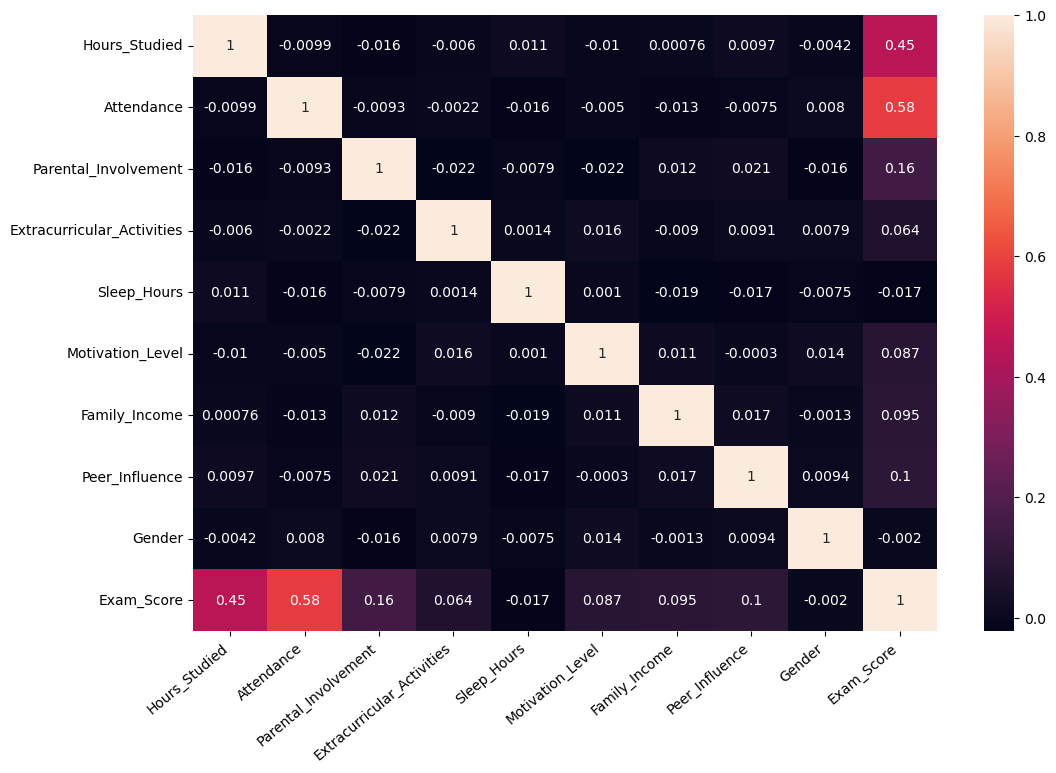

In [25]:
correlation_matrix = df2.corr()
plt.figure(figsize=(12, 8)) 
sns.heatmap(correlation_matrix, annot = True) # annot = True will show the values within the cells
plt.xticks(rotation = 40, ha='right') # ha = 'right' will make the x-axis labels appear horizontally so that they do not overlap
plt.show()

#### Key Analysis from Correlation Matrix



Strong predictors of Exam Performance: 
- Attendance (strongest correlation: 0.581).
- Hours_Studied (moderate correlation: 0.445).

Weak or Indirect Predictors:
- Parental Involvement, Peer Influence, and Motivation Level have weak positive relationships with exam performance.

Some Unexpected Findings:
- Study Hours and Attendance have no meaningful correlation (-0.009). Contrary to the hypothesis, students with high attendance do not seem to study more, and vice versa.
- Sleep hours have a weak negative correlation with exam performance (-0.1). 

Multicollinearity: A situation where two or more variables are highly correlated. Generally, a correlation above 0.8 or below -0.8 between indepdent variables is considered multicollinearity. In this case, there is no multicollinearity between the variables because the highest correlation is 0.581 between Attendance and Exam Performance. Therefore, we can skip removing variables or combining variables to create a composite variable.

There is a need for further analysis to understand the complex relationships between these variables and student performance. For example, it might be worth investigating if motivation affects other factors like study hours or attendance.

Note: Correlation only captures linear relationships, so it’s useful to also use other plots for key features to detect non-linear patterns.


#### Data Visualization

<b> Question: What is the distrubution of the final exam scores? </b>

<Axes: xlabel='Exam_Score', ylabel='Count'>

Text(0.5, 0, 'Exam Score')

Text(0, 0.5, 'Rate')

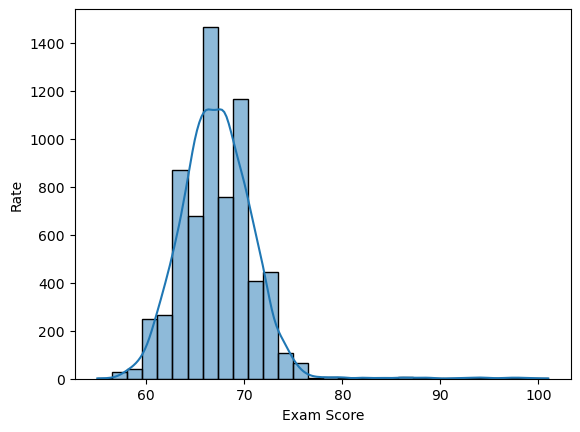

In [26]:
# Histograms to show the distribution of the data
sns.histplot(df2['Exam_Score'], bins = 30, kde = True)
plt.xlabel('Exam Score')
plt.ylabel('Rate')

While exam scores might deviate slightly from normality (due to right skewness in the graph above), this is not a critical issue in Statemodel multiple linear regression method.

<b> Relationship Between Hours Studied and Exam Performance </b>

<Axes: xlabel='Hours_Studied', ylabel='Exam_Score'>

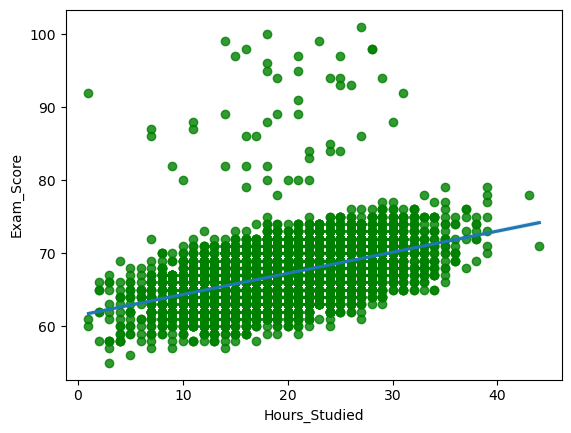

In [27]:
sns.regplot(x = "Hours_Studied", y = "Exam_Score", data=df2, scatter_kws={'color': 'green'})
# For numerical vs. numerical relationships

There is a postive slope between Hours Studied and Exam Performance. This indicates that as the number of hours studied increases, the exam performance also increases. Confirms Hypothesis 1 and Conjecture 2.

There are some outliers in the data, but they are not significant enough to affect the overall trend because the majority of the data points follow the positive slope.

<b> Relationship Between Attendance and Exam Performance </b>

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

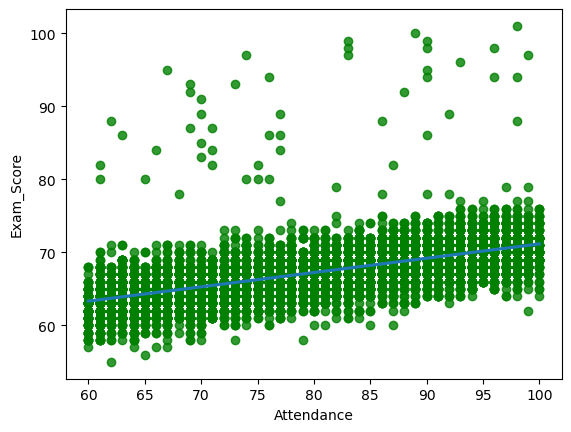

In [28]:
sns.regplot(x = "Attendance", y = "Exam_Score", data=df2, scatter_kws={'color': 'green'})

There is a positive slope between Attendance and Exam Performance. This indicates that as the number of hours studied increases, the exam performance also increases. Confirms Hypothesis 1 and Conjecture 2.

There are some outliers in the data, but they are not significant enough to affect the overall trend because the majority of the data points follow the positive slope.

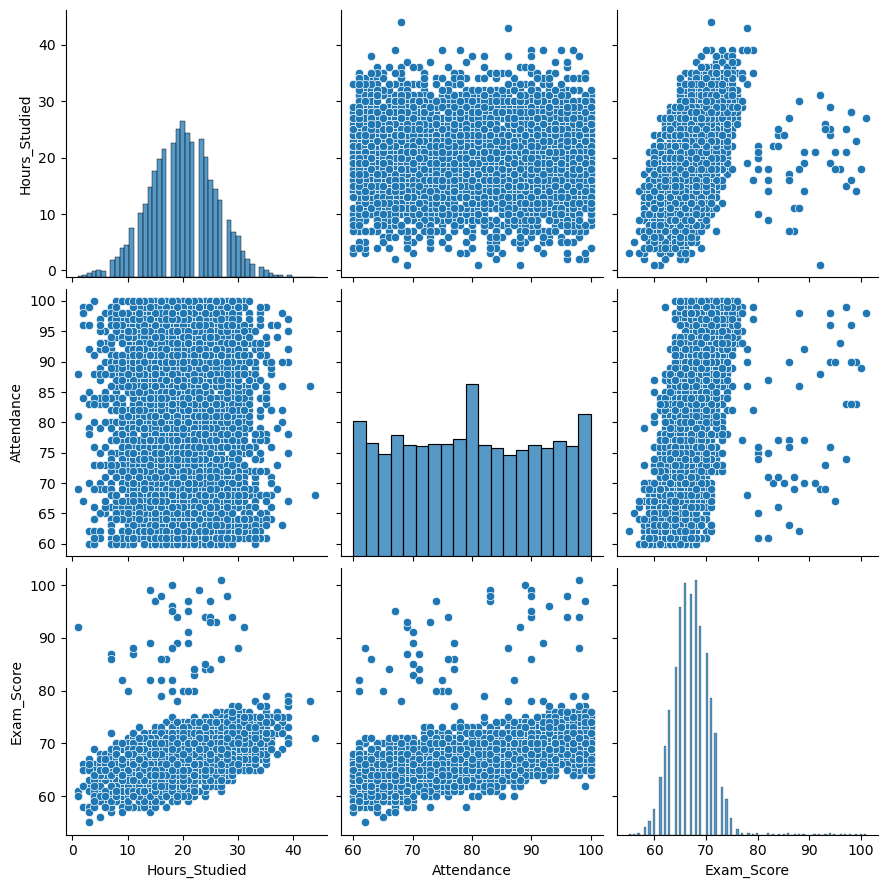

In [29]:
sample = df2.sample(frac = 0.1, random_state = 42) # We are sampling the data to make the pairplot more readable
sns.pairplot(df2[['Hours_Studied', 'Attendance', 'Exam_Score']], height = 3)

Again, the scatter plot shows a positive relationship between Hours Studied and Exam Performance. There is a clear upward trend. 

The scatter plot between Attendance and Exam_Score shows a slight upward trend, but it's not as strong as the previous one. 

<b> Question: What is the relationship between Hours Studied and Attendance? Do they work indepdently or together to affect Exam Performance? </b>

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Attendance_Binned', ylabel='Hours_Studied_Binned'>

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 [Text(0.5, 0, '(59.96, 64.0]'),
  Text(1.5, 0, '(64.0, 68.0]'),
  Text(2.5, 0, '(68.0, 72.0]'),
  Text(3.5, 0, '(72.0, 76.0]'),
  Text(4.5, 0, '(76.0, 80.0]'),
  Text(5.5, 0, '(80.0, 84.0]'),
  Text(6.5, 0, '(84.0, 88.0]'),
  Text(7.5, 0, '(88.0, 92.0]'),
  Text(8.5, 0, '(92.0, 96.0]'),
  Text(9.5, 0, '(96.0, 100.0]')])

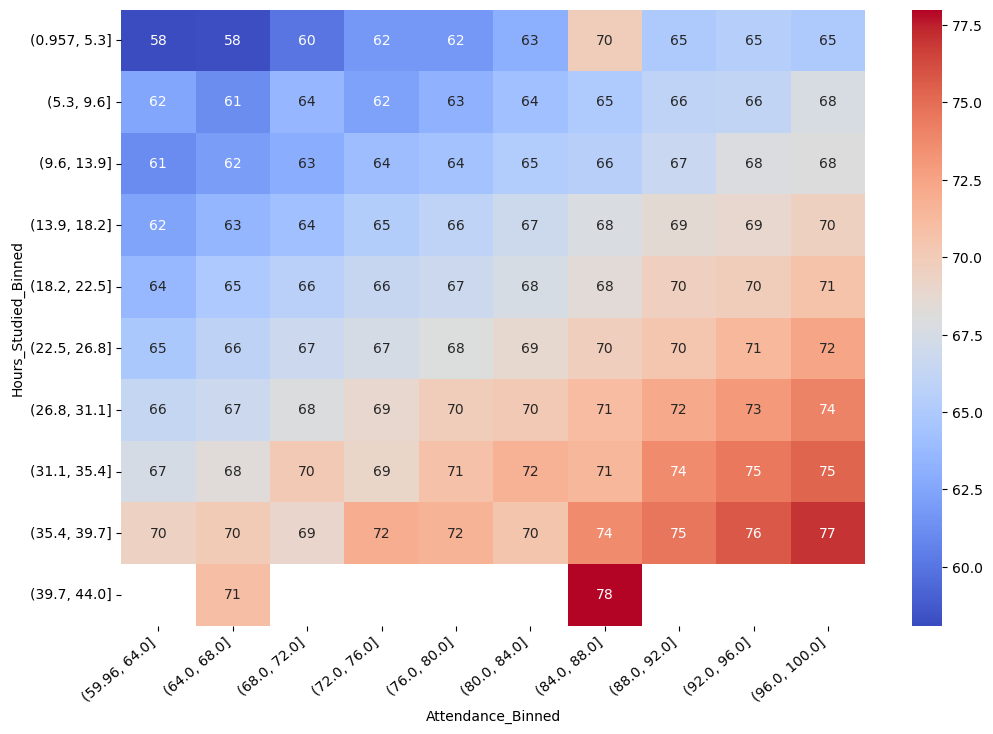

In [30]:
# A heatmap can be created by first binning the Hours_Studied and Attendance values into discrete intervals and then aggregating the average Exam_Score for each combination.

# Step 1: Binning the Hours_Studied and Attendance columns into 10 bins 
df2['Hours_Studied_Binned'] = pd.cut(df2['Hours_Studied'], bins = 10)
df2['Attendance_Binned'] = pd.cut(df2['Attendance'], bins = 10)

# Step 2: Grouping the data by the binned columns and calculating the average Exam_Score for each combination
# unstack() is used to pivot the data so that it can be visualized as a heatmap and not as a table
data_heatmap = df2.groupby(['Hours_Studied_Binned', 'Attendance_Binned'])['Exam_Score'].mean().unstack()

# Step 3: Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data_heatmap, annot = True, cmap = 'coolwarm')
plt.xticks(rotation = 40, ha = 'right') 

The highest score, 78, occurs in the cell corresponding to the highest Hours Studied range (39.7-44.0) and the second-highest Attendance range (88.0-92.0). There is a combined effect, so both variables together significantly influence the Exam Scores.

<b> Relationship Between Motivation Level and Exam Performance </b>

<Axes: xlabel='Motivation_Level', ylabel='Exam_Score'>

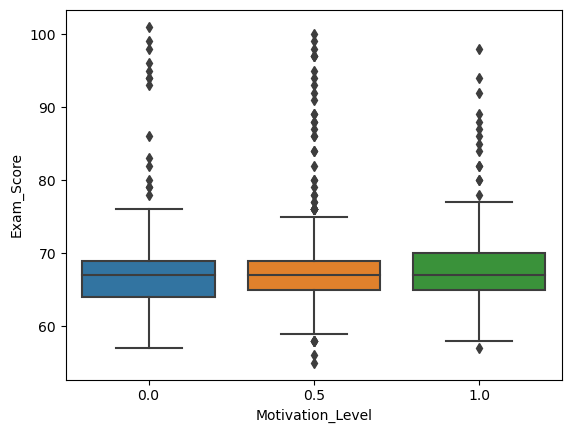

In [31]:
sns.boxplot(x = "Motivation_Level", y = "Exam_Score", data=df2)
# For categorical vs. numerical relationships

The median (horizontal line in each box) slightly increases from Motivation_Level 0.0 to 1.0, indicating higher motivation might correspond to better exam scores.

However, the presence of outliers at all levels suggests heterogeneity, which means that students with the same motivation level might have different exam scores. 

Hence, motivation may influence performance but isn't the sole determining factor (similar to correlation matrix analysis).


<b> Relationship Between Parental Involvement and Exam Score </b>

<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

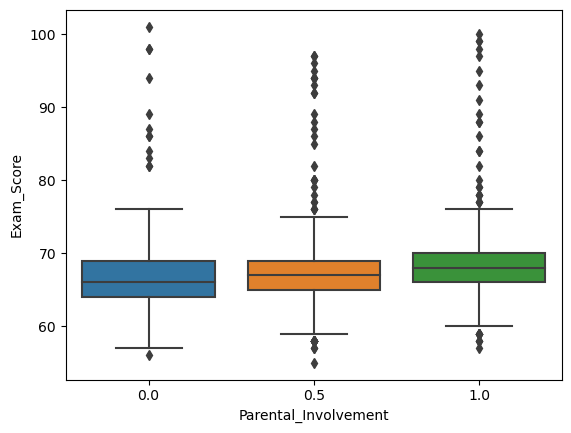

In [32]:
sns.boxplot(x = "Parental_Involvement", y = "Exam_Score", data=df2)

Reinforcement of Previous Observations Correlation Test: The boxplot shows that students with higher parental involvement (1.0) tend to have slightly higher exam scores compared to those with no or partial involvement. The overlap in score distributions, however, suggests that the correlation, if present, may not be strong.

After observing the slight difference, we want to check if the difference is statistically significant, so we will conduct an ANOVA test to compare the means of the groups.

<b> ANOVA Statistical Test (Analysis of Variance) </b>

<b> Question: Why are we using ANOVA here? Why not t-test? </b>

ANOVA is used when we have more than two groups to compare. In this case, we have three groups or more for columns (such as parental involvement).

Since we have unique rows for students, that means the data consists of independent observations, we would use one-way ANOVA (without repeated measures).

Null Hypothesis: There is no significant difference in exam scores between students with different levels of parental involvement.

Alternative Hypothesis: There is a significant difference in exam scores between students with different levels of parental involvement.

In [33]:
# We need to create groups based on the Parental_Involvement column and then perform one-way ANOVA to determine if there is a significant difference in the mean exam scores between the groups.
group_1 = df2[df2['Parental_Involvement'] == 0.0]['Exam_Score']
group_2 = df2[df2['Parental_Involvement'] == 0.5]['Exam_Score']
group_3 = df2[df2['Parental_Involvement'] == 1.0]['Exam_Score']

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_1, group_2, group_3)

print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 84.48765484606227
p-value: 5.875479153325444e-37


Since the p-value is significantly less than 0.05, we can reject the null hypothesis. This means that parental involvement likely has an effect on student performance.

<b> Relationship Between Peer Influence and Exam Performance </b>

<Axes: xlabel='Peer_Influence', ylabel='Exam_Score'>

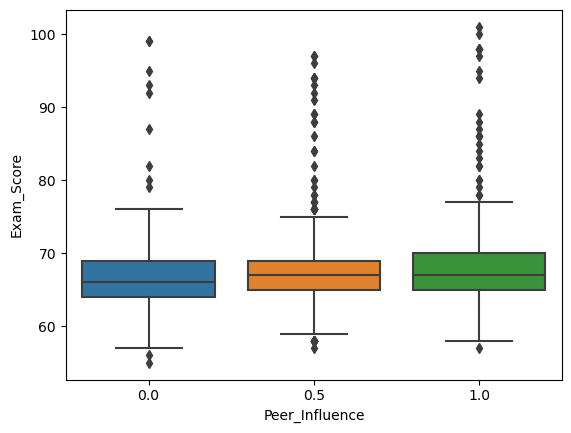

In [34]:
sns.boxplot(x = "Peer_Influence", y = "Exam_Score", data = df2)

The median and distribution of Exam Score are relatively stable across Peer Influence levels. There are defintely outliers, but the overall trend is not very clear. Therefore, we see a negligible relationship between Peer Influence and Exam Performance.

<b> Relationship Between Study Hours and Attendance </b>

The thought is that students who study more might attend more classes. However, the scatter plot below shows no clear relationship between the two variables.

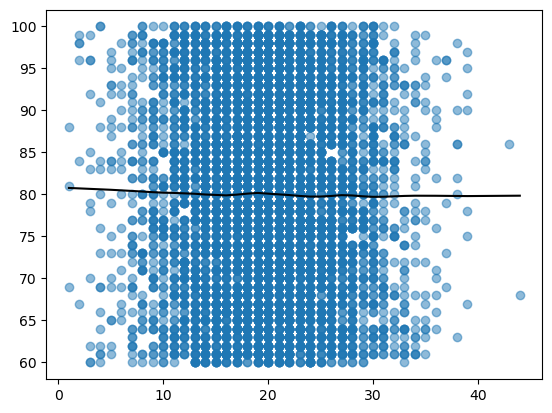

In [35]:
# Statsmodels is a Python module that provdes lowess function to calculate the LOESS (Locally Estimated Scatterplot Smoothing) curve.
from statsmodels.nonparametric.smoothers_lowess import lowess

# frac parameter is used to control the smoothness of the curve
smoothed_curve = lowess(df2['Attendance'], df2['Hours_Studied'], frac=0.5)

# alpha parameter is used to control the transparency of the points
plt.scatter(df2['Hours_Studied'], df2['Attendance'], alpha = 0.5)

# smoothed[:, 0] contains the x values and smoothed[:, 1] contains the y values
plt.plot(smoothed_curve[:, 0], smoothed_curve[:, 1], color='black')

The flat nature of the LOWESS curve implies that changes in Hours Studied do not significantly correlate with variations in Attendance.

****

The hypothesis "Lower motivation levels are associated with lower exam scores" aligns naturally with the inclusion of effort-related features like Study Hours or Attendance:

- Students with low motivation might:
    - Study less (lower Study Hours).
    - Attend fewer classes (lower Attendance).
    - Perform poorly in exams (lower Exam Scores).

- Students with high motivation might:
    - Study more (higher Study Hours).
    - Attend more classes (higher Attendance).
    - Perform better in exams (higher Exam Scores).

<Axes: xlabel='Attendance', ylabel='Exam_Score'>

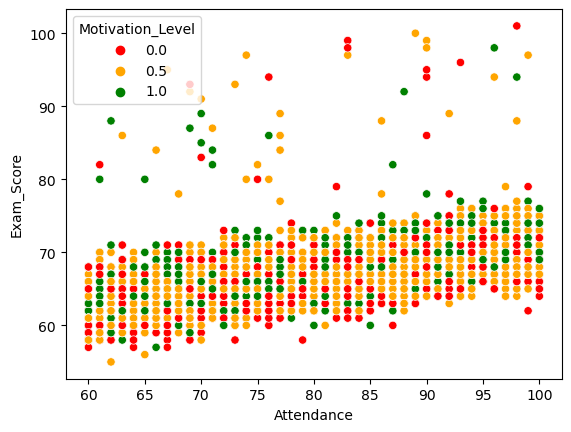

In [36]:
# Palette is used to define the colors of the points based on the Motivation_Level 
custom_palette = {0.0: "red", 0.5: "orange", 1.0: "green"}

# The hue parameter is used to color the points based on the Motivation_Level
# The graph will show the relationship between Hours_Studied and Exam_Score, with the points colored based on the Motivation_Level
sns.scatterplot(data = df2, x = "Attendance", y = "Exam_Score", hue = "Motivation_Level", palette = custom_palette)

Reinforecement of Previous Findings: Exam scores tend to increase with higher attendance, indicating a positive correlation between attendance and exam performance.

Motivation_Level appears less predictive because high-scoring students are distributed across all motivation levels. However, we can quantify this with an lmplot which is specifically designed for visualizing linear relationships with optional grouping by a categorical variable (i.e. here, Attendance).

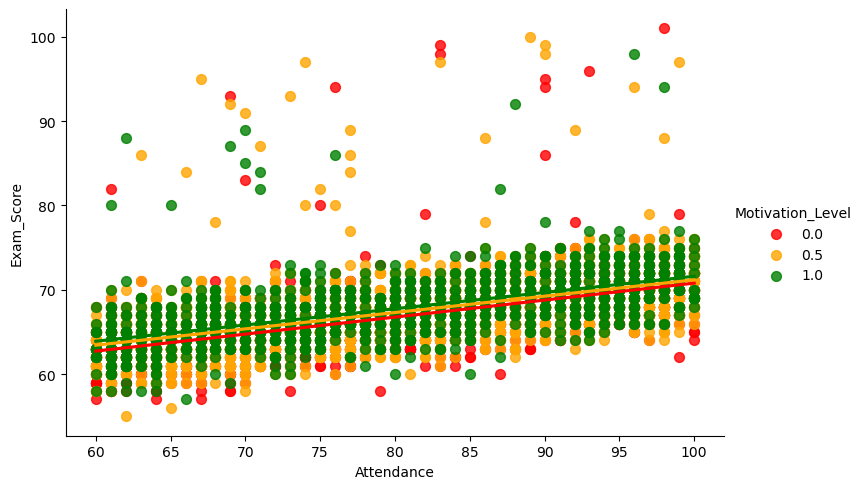

In [37]:
sns.lmplot(data = df2, x = 'Attendance', y = 'Exam_Score', hue = 'Motivation_Level', ci = None, aspect = 1.5, palette = custom_palette, scatter_kws = {'s': 50})

All three motivation levels (0.0, 0.5, 1.0) overlap significantly, meaning students with lower motivation (red, 0.0) can still achieve high scores, and highly motivated students (green, 1.0) can occasionally score lower.

We know that Study Hours and Attendance do not have a meaningful correlation. Therefore, it won't be surprising if the lmplot shows a similar pattern for Study Hours (i.e. if it is added as another predictor). 

We will skip this analysis for now.

<b> Difference in Distribution of Exam Scores across Levels of Parental Involvement within each Motivation Level </b>

<Axes: xlabel='Parental_Involvement', ylabel='Exam_Score'>

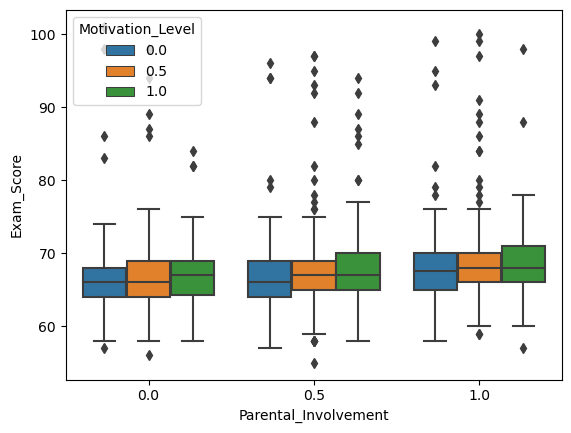

In [38]:
sns.boxplot(x = 'Parental_Involvement', y = 'Exam_Score', hue = 'Motivation_Level', data = df2)

At each level of Parental Involvement, students with higher Motivation Level (green and 1.0) seem to achieve higher exam scores compared to students with lower motivation (blue and 0.0).

This suggests an <b> interaction effect </b>: motivated students benefit more from parental involvement.

<b> Relationship Between Gender and Exam Performance </b>

We explored most hypotheses and conjectures, but it is also important to see how gender affects exam performance.

If it does, are there any indicators of which gender attends class more or studies more?

All in all, does gender matter in predicting exam performance?

<Axes: xlabel='Gender', ylabel='Exam_Score'>

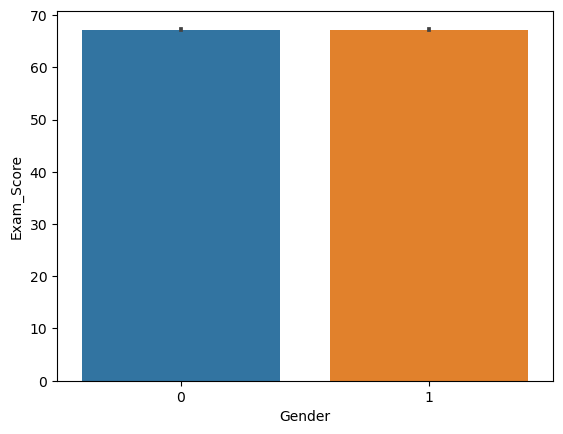

In [39]:
# Average exam scores for each gender
sns.barplot(x = "Gender", y = "Exam_Score", data=df2)

The bar plot above shows that the average exam score for both Male and Female students is roughly the same. Hence, gender might not be a significant predictor of exam performance.

Since gender shows no significant variation in exam scores, there is no need to complicate the analysis by checking gender alongside other factors.

#### 6. Interaction Terms/Effects

Previously, we observed that students with higher motivation levels benefit more from parental involvement. This is an interaction effect.

In [40]:
df2['Motivation_By_PI'] = df2['Motivation_Level'] * df2['Parental_Involvement']

In [41]:
df2['Hours_Attendance_Interaction'] = df2['Hours_Studied'] * df2['Attendance']

In [42]:
df2

,Hours_Studied,Attendance,Parental_Involvement,Extracurricular_Activities,Sleep_Hours,Motivation_Level,Family_Income,Peer_Influence,Gender,Exam_Score,Hours_Studied_Binned,Attendance_Binned,Motivation_By_PI,Hours_Attendance_Interaction
0,23,84,0.0,0,7,0.0,0.0,1.0,1,67,"(22.5, 26.8]","(80.0, 84.0]",0.00,1932
1,19,64,0.0,0,8,0.0,0.5,0.0,0,61,"(18.2, 22.5]","(59.96, 64.0]",0.00,1216
2,24,98,0.5,1,7,0.5,0.5,0.5,1,74,"(22.5, 26.8]","(96.0, 100.0]",0.25,2352
3,29,89,0.0,1,8,0.5,0.5,0.0,1,71,"(26.8, 31.1]","(88.0, 92.0]",0.00,2581
4,19,92,0.5,1,6,0.5,0.5,0.5,0,70,"(18.2, 22.5]","(88.0, 92.0]",0.25,1748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,1.0,0,7,0.5,1.0,1.0,0,68,"(22.5, 26.8]","(68.0, 72.0]",0.50,1725
6603,23,76,1.0,0,8,0.5,0.0,1.0,0,69,"(22.5, 26.8]","(72.0, 76.0]",0.50,1748
6604,20,90,0.5,1,6,0.0,0.0,0.0,0,68,"(18.2, 22.5]","(88.0, 92.0]",0.00,1800
6605,10,86,1.0,1,6,1.0,0.0,1.0,0,68,"(9.6, 13.9]","(84.0, 88.0]",1.00,860


Later Usage of Interaction Term: 
- We can include an interaction term between Motivation Level and Parental Involvement in the regression model to capture this effect.
- Prediction: This improves predictive performance in statistical and machine learning models, such as metrics like R-squared or accuracy. 

#### 7. Linear Regression

To execute single and multiple variable linear regression on our data, I used the statsmodel library. For single linear regression, I ran a linear regression model (using Ordinary Least Squares method) on each individual feature. For multiple linear regression, I ran a single linear regression model but collectively used all the features as input.

##### How to Interpret the Summaries:

<ol>
    <li>Coefficients:</li>
        <ul><li>Indicates the direction and magnitude of the relationship.</li><li>For example, a higher/positive coefficient means that a feature is positively associated with Exam_Score.</li></ul>
    <li>p-values:</li>
        <ul><li>Determines the statistical significance.</li><li>A small p-value (for example, <0.05) indicates that the feature most likely affects Exam_Score.</li></ul>
    <li>R-squared:</li>
            <ul><li>Shows the variability of the predicted exam scores compared to the actual exam scores.</li><li>Higher values mean better fit.</li></ul>
</ol>

Note: The same may have different coefficients or significance in single linear regression compared to multiple linear regression. This is because multiple linear regression takes into account other features that may be more statistically significant and explains the dependent variable better.

##### Single Linear Regression:

In [43]:
import statsmodels.api as sm

X = ["Hours_Studied", "Attendance", "Motivation_Level", "Parental_Involvement", "Peer_Influence"]
y = df2["Exam_Score"]
single_lin_reg = {}

for feature in X:
    X = sm.add_constant(df2[feature])
    slr_model = sm.OLS(y, X).fit()
    single_lin_reg[feature] = slr_model.summary()

for feature, summary in single_lin_reg.items():
    print("Single Linear Regression:", feature, "and Exam_score")
    print(summary)
    print("\n")

Single Linear Regression: Hours_Studied and Exam_score
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     1635.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):          1.29e-319
Time:                        10:03:58   Log-Likelihood:                -17620.
No. Observations:                6607   AIC:                         3.524e+04
Df Residuals:                    6605   BIC:                         3.526e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

##### Multiple Linear Regression:

In [44]:
X = df2[["Hours_Studied", "Attendance", "Motivation_Level", "Parental_Involvement", "Peer_Influence"]]
X = sm.add_constant(X)
mlr_model = sm.OLS(y, X).fit()

print("Multiple Linear Regression:")
print(mlr_model.summary())

Multiple Linear Regression:
                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     1893.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:03:58   Log-Likelihood:                -15412.
No. Observations:                6607   AIC:                         3.084e+04
Df Residuals:                    6601   BIC:                         3.088e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
cons

#### 8. Feature Importance

In [45]:
from sklearn.linear_model import Lasso

<BarContainer object of 10 artists>

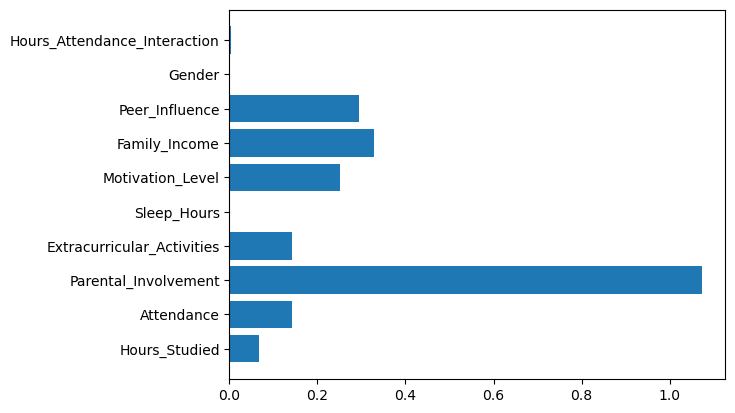

In [46]:
# Drop interval columns
df2_cleaned = df2.drop(columns=['Hours_Studied_Binned', 'Attendance_Binned', 'Motivation_By_PI'], inplace = False)

# Fit the model
X = df2_cleaned.drop('Exam_Score', axis = 1).values
Y = df2_cleaned['Exam_Score'].values
names = df2_cleaned.drop('Exam_Score', axis = 1).columns
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, Y).coef_

plt.barh(names, lasso_coef)
plt.show()